In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import keygen as kg

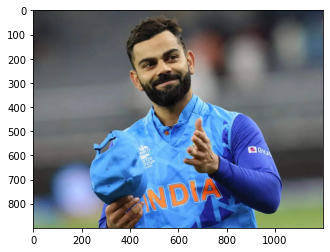

In [2]:
img=cv2.imread("kohli.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
original_img=img
plt.imshow(img)

In [28]:
img[1]

array([[  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       ...,
       [  0,   0, 180],
       [  0,   0,   8],
       [  0,   0,   0]], dtype=uint8)

In [4]:
img.shape

(900, 1200, 3)

In [5]:
rows=img.shape[0]
cols=img.shape[1]

In [6]:
#defining the function to generate the key using chaotic map for encryption process

def keygen(x,r,size):
    key = []
    for i in range(size):
        x = r*x*(1-x)  #logistic map
        key.append(int((x*pow(10,16))%256))#key  =(x*10^16)%256
    return key
key = keygen(0.1,3.915,rows*cols)

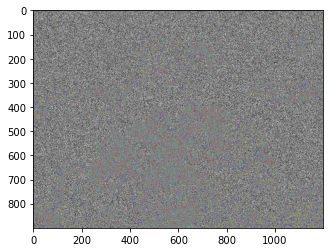

In [7]:
#Encryption --- Substitution with XOR

z = 0
for i in range(rows):
    for j in range(cols):
        img[i,j] = img[i,j]^key[z]
        z+=1

plt.imshow(img)

In [8]:
red=[]
for i in range(rows):
    col = []
    for j in range(cols):
        col.append(img[i,j,0])
    red.append(col)

In [9]:
blue=[]
for i in range(rows):
    col = []
    for j in range(cols):
        col.append(img[i,j,1])
    blue.append(col)

In [29]:
green=[]
for i in range(rows):
    col = []
    for j in range(cols):
        col.append(img[i,j,2])
    green.append(col)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [11]:
for i in range(rows):
    for j in range(cols):
        red[i][j]=pow(2,red[i][j]*0.65)

In [12]:
for i in range(rows):
    for j in range(cols):
        blue[i][j]=pow(2,blue[i][j]*0.65)

In [13]:
for i in range(rows):
    for j in range(cols):
        green[i][j]=pow(2,green[i][j]*0.65)

In [14]:
for i in range(rows):
    for j in range(cols):
        img[i,j,0]=red[i][j]

In [15]:
for i in range(rows):
    for j in range(cols):
        img[i,j,1]=blue[i][j]

In [16]:
for i in range(rows):
    for j in range(cols):
        img[i,j,2]=green[i][j]

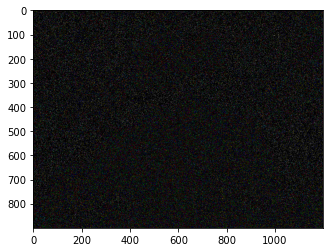

In [17]:
plt.imshow(img)
encrypted_img=img

In [18]:
import math

In [19]:
for i in range(rows):
    for j in range(cols):
        z=math.log(red[i][j],2)
        z=z/0.65
        if (z>=0 and z<=256):
            img[i,j,0]=z
        else:
            img[i,j,0]=0       

In [20]:
for i in range(rows):
    for j in range(cols):
        z=math.log(blue[i][j],2)
        z=z/0.65
        if (z>=0 and z<=256):
            img[i,j,1]=z
        else:
            img[i,j,1]=0       

In [21]:
for i in range(rows):
    for j in range(cols):
        z=math.log(green[i][j],2)
        z=z/0.65
        if (z>=0 and z<=256):
            img[i,j,2]=z
        else:
            img[i,j,2]=0       

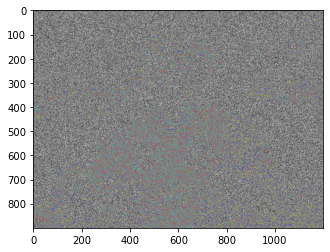

In [22]:
plt.imshow(img)

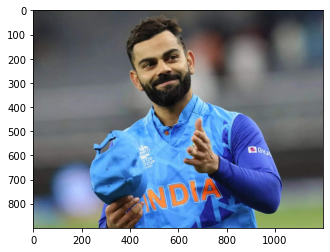

In [23]:
#Decryption of chatic map generated image
z = 0
for i in range(rows):
    for j in range(cols):
        img[i,j] = img[i,j]^key[z]
        z+=1
plt.imshow(img)

In [24]:
for i in range(rows):
    for j in range(cols):
        z=math.log(red[i][j],3)
        z=z/0.05
        if (z>=0 and z<=256):
            img[i,j,0]=z
        else:
            img[i,j,0]=0       

In [25]:
for i in range(rows):
    for j in range(cols):
        z=math.log(blue[i][j],3)
        z=z/0.05
        if (z>=0 and z<=256):
            img[i,j,1]=z
        else:
            img[i,j,1]=0       

In [26]:
for i in range(rows):
    for j in range(cols):
        z=math.log(green[i][j],3)
        z=z/0.05
        if (z>=0 and z<=256):
            img[i,j,2]=z
        else:
            img[i,j,2]=0       

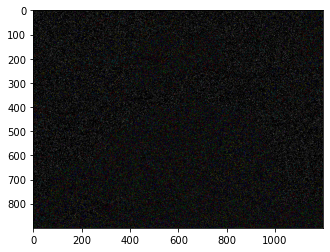

In [27]:
plt.imshow(img)